<a href="https://colab.research.google.com/github/marinacer/IA048/blob/main/IA048.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Final IA048


In [253]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [254]:
# abre o arquivo Skyserver.csv em type lista
with open('Skyserver.csv') as file:
    reader = csv.reader(file)
    dados = list(reader)

dados = np.asarray(dados)                  # transforma de lista para np.array
dados = np.delete(dados, np.s_[0], axis=0) # remove o cabeçalho
y = dados[:,13]                            # atribui ao y a coluna de label
dados = np.delete(dados, np.s_[13], axis=1)# remove coluna de label de X
dados = np.delete(dados, np.s_[9], axis=1)

In [255]:
# transforma as strings da array em float
X = []
for h in range(len(dados)):
  data = dados[h].ravel()
  X.append(list(map(float,data)))
X = np.asarray(X)

In [256]:
# label encoding: GALAXY -> 0, QSO -> 1, STAR -> 2
label = preprocessing.LabelEncoder()
label.fit(y)
print(label.classes_)
y = label.transform(y)

['GALAXY' 'QSO' 'STAR']


In [257]:
# cria as matrizes X e y sendo 20% dos dados para teste e o restante para treino
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [258]:
print("Número de atributos: ", len(Xtrain[0]))
print("Número de amostras de treino: ", len(Xtrain[:,0]))
print("Número de amostras de teste: ", len(Xtest[:,0]))

Número de atributos:  16
Número de amostras de treino:  80000
Número de amostras de teste:  20000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


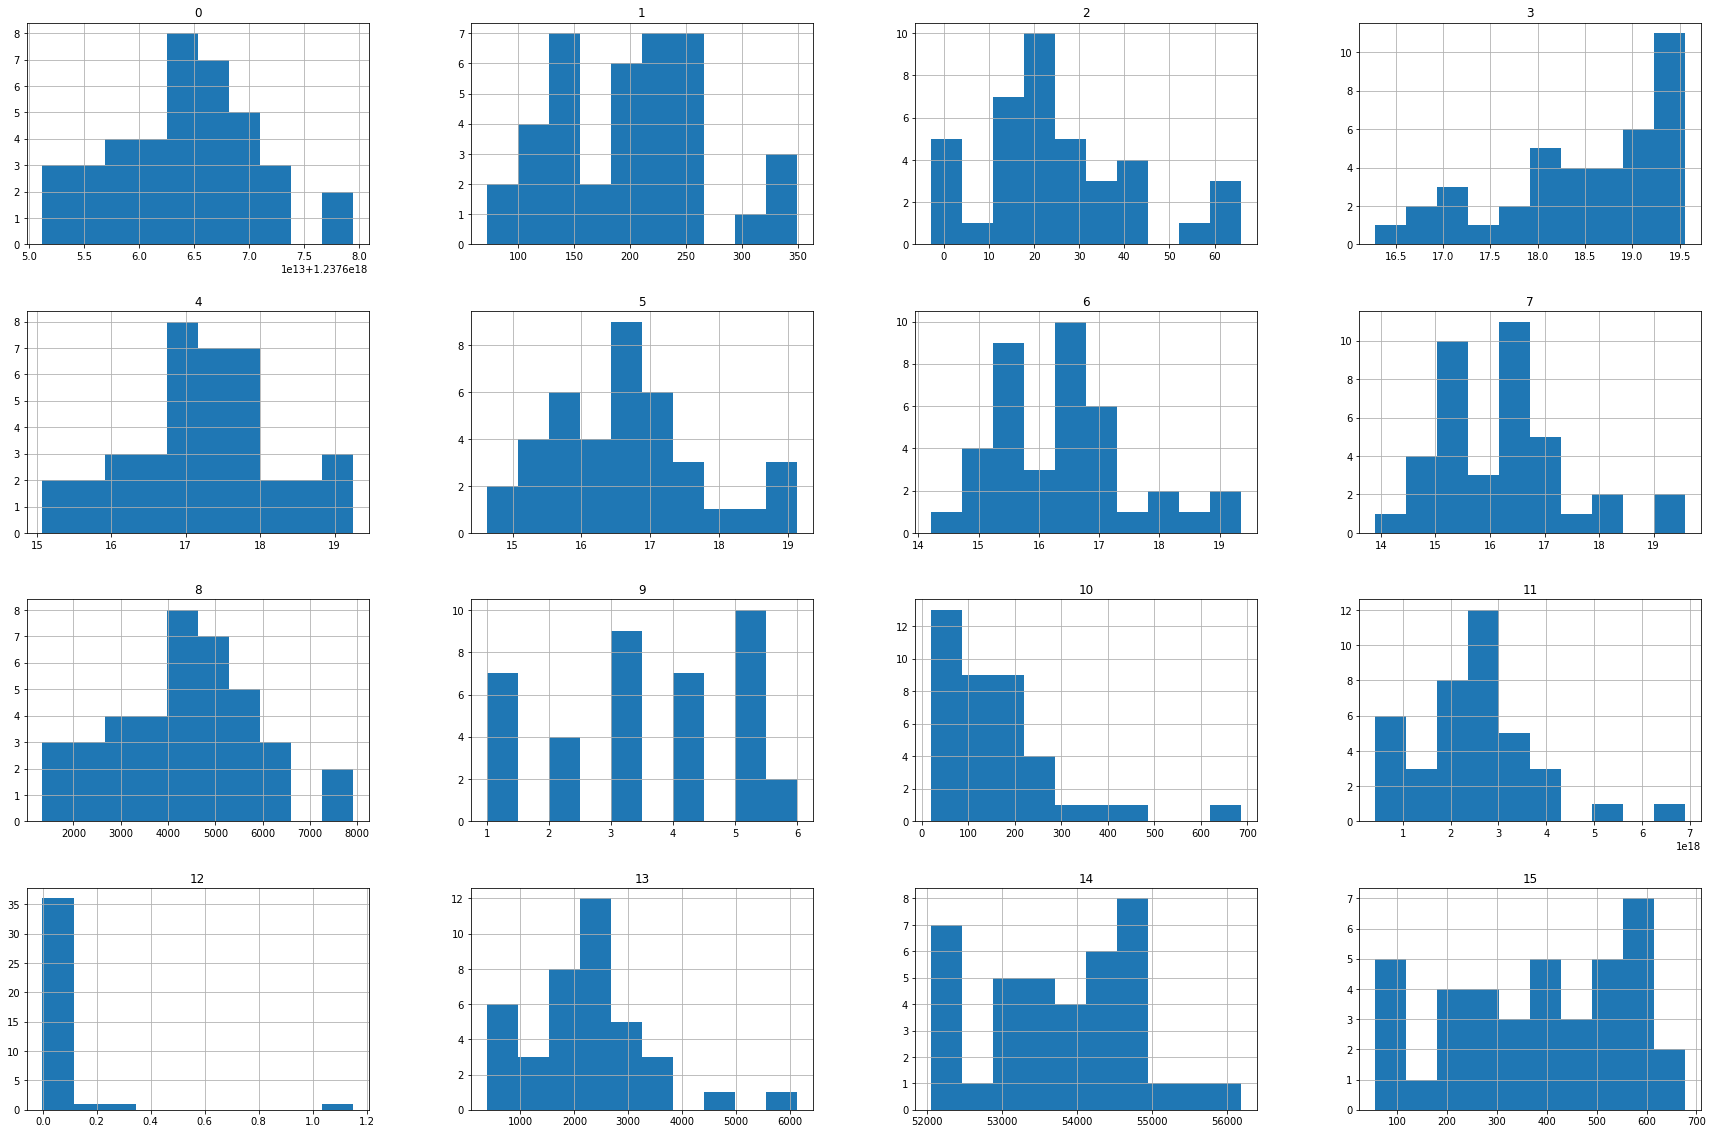

In [259]:
Xtrainpd = pd.DataFrame(Xtrain[1:40])
fig, ax = plt.subplots(figsize=(30,20)) 
Xtrainpd.hist(ax = ax)
pass

In [260]:
Xtrainpd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01,39.000000,39.000000,39.000000,39.000000
mean,1.237664e+18,199.243294,24.412877,18.531347,17.216184,16.673317,16.413939,16.246101,4316.025641,3.384615,162.205128,2.452084e+18,0.074959,2177.794872,53769.076923,380.846154
std,6.569699e+12,69.261793,16.989250,0.908129,0.981121,1.059209,1.128407,1.186588,1529.636721,1.549455,130.900963,1.284882e+18,0.186314,1141.210811,1043.755804,183.084326
min,1.237651e+18,71.714622,-2.912431,16.277320,15.076540,14.624150,14.205600,13.889450,1345.000000,1.000000,19.000000,4.177240e+17,-0.001126,371.000000,52055.000000,55.000000
25%,1.237660e+18,140.058366,14.312898,17.992395,16.700335,15.885125,15.528185,15.302420,3442.000000,2.000000,69.500000,1.791978e+18,-0.000031,1591.500000,52990.500000,237.000000
50%,1.237665e+18,206.534707,22.374236,18.733020,17.209150,16.747470,16.464020,16.264980,4569.000000,3.000000,144.000000,2.456843e+18,0.043918,2182.000000,53740.000000,396.000000
75%,1.237668e+18,240.870389,31.992768,19.320070,17.753335,17.238310,16.921375,16.760675,5230.000000,5.000000,203.000000,3.009678e+18,0.073695,2673.000000,54553.000000,525.000000
max,1.237679e+18,349.411911,65.933871,19.561360,19.248220,19.130780,19.361650,19.582170,7912.000000,6.000000,687.000000,6.907419e+18,1.149993,6135.000000,56192.000000,678.000000


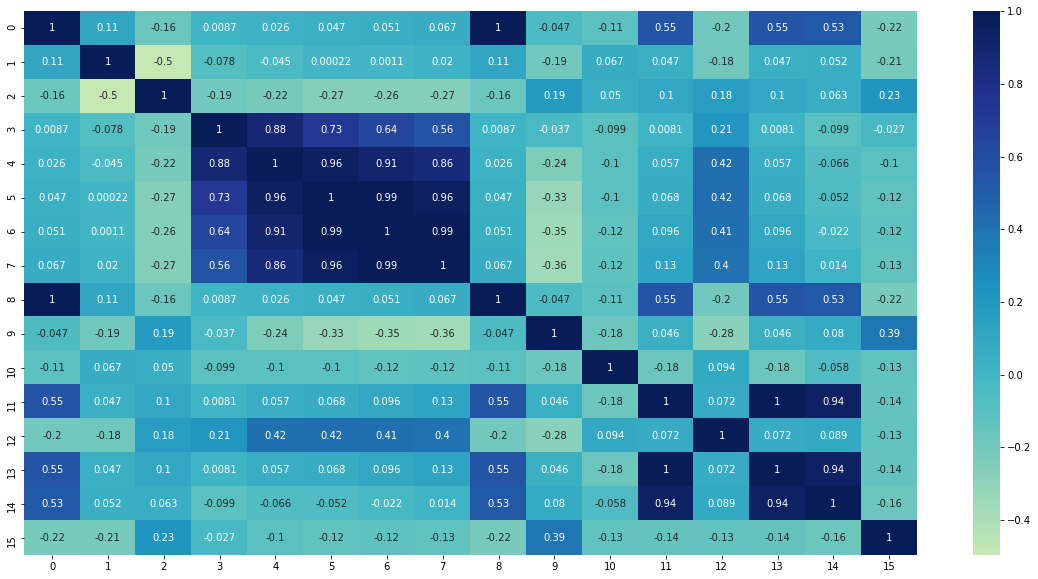

In [261]:
corrMatrix = Xtrainpd.corr()
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, ax=ax,cmap="YlGnBu", center = 0)
plt.show()

In [262]:
# normalização
mean_norm = Xtrain.mean()
std_norm = Xtrain.std()
nstd = 4
Xtrain_norm = (Xtrain - mean_norm)/(nstd*std_norm)
Xtest_norm = (Xtest - mean_norm)/(nstd*std_norm)

Tentativa 1: softmax


In [263]:
logreg = LogisticRegression(max_iter=3500, multi_class='multinomial', penalty = 'none')
logreg.fit(Xtrain_norm, ytrain)
y_softmax = logreg.predict(Xtest_norm)

In [264]:
cmatrixsoftmax = sk.confusion_matrix(ytest,y_softmax)
print(cmatrixsoftmax)

[[9570    0  720]
 [1266    0  874]
 [3720    0 3850]]


Tentativa 2: one-vs-all

In [265]:
clf = LogisticRegression(max_iter=3500, multi_class='ovr', penalty = 'none').fit(Xtrain_norm, ytrain)
y_pred2oneall = clf.predict(Xtest_norm)

In [266]:
# matriz de confusão
cmatrix2oneall = sk.confusion_matrix(ytest,y_pred2oneall)
print(cmatrix2oneall)

[[9705    0  585]
 [1287    0  853]
 [4441    0 3129]]


Tentativa 3: KNN

In [267]:
F1medida_knn = []
nknn = 31
for i in range(1,nknn):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(Xtrain, ytrain)
    y_pred_knn = neigh.predict(Xtest)
    F1medida_knn.append(f1_score(ytest, y_pred_knn, average='macro'))
    print('F1medida para k = ',i, ': ', F1medida_knn[i-1])
    print('Matriz de confusão para k = ', i)
    print(sk.confusion_matrix(ytest,y_pred_knn))
    print()



F1medida para k =  1 :  0.5810959107796779
Matriz de confusão para k =  1
[[8005 1008 1277]
 [1037  457  646]
 [1266  615 5689]]

F1medida para k =  2 :  0.6204654201434017
Matriz de confusão para k =  2
[[9529  435  326]
 [1318  520  302]
 [1765  775 5030]]

F1medida para k =  3 :  0.6092731505531829
Matriz de confusão para k =  3
[[9235  359  696]
 [1215  344  581]
 [1530  349 5691]]

F1medida para k =  4 :  0.6268790097257214
Matriz de confusão para k =  4
[[9540  238  512]
 [1257  421  462]
 [1587  487 5496]]

F1medida para k =  5 :  0.6195456223377018
Matriz de confusão para k =  5
[[9552  256  482]
 [1264  342  534]
 [1546  363 5661]]

F1medida para k =  6 :  0.6245922919637955
Matriz de confusão para k =  6
[[9675  155  460]
 [1283  353  504]
 [1597  369 5604]]

F1medida para k =  7 :  0.6197370969651076
Matriz de confusão para k =  7
[[9680  141  469]
 [1275  310  555]
 [1559  317 5694]]

F1medida para k =  8 :  0.625012104305755
Matriz de confusão para k =  8
[[9751  120  419]

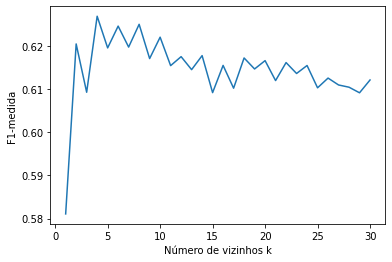

In [268]:
plt.plot(range(1,nknn),F1medida_knn)
plt.xlabel('Número de vizinhos k');
plt.ylabel('F1-medida');
pass